<a href="https://colab.research.google.com/github/JVCarmich0959/CSC228/blob/main/Jackie's_Copy_of_CSC228_Lesson06_Focus_On_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Focus on Word Embeddings 
#
# Owner:  Lorrie Tomek
#
# Uses Libraries:  gensim
# Runtime:  Google CoLab (cpu)
# 
# Data: 
#
# Reference:  https://realpython.com/python-keras-text-classification/
# Reference:  https://www.askpython.com/python-modules/gensim-word2vec

## Focus on Word Embeddings

What Is a Word Embedding? 

**Word embeddings** : are a type of representation for words in natural language processing (NLP) that aim to capture their meaing and relationships to other words in a mathematical way.

There are various ways to vectorize text; aka, to convert text to numerical vectors. 

Thus far, we have seen: 

* Sentences represented by a numeric vector

In this section, we will see: 
* Words represented by each word as a vector

Other ways include: 

* N-grams of words/characters represented as a vector 
* Sub-Words represented as a vector

Different approaches/methods using each of these ideas can be used in Natural Language Procesing (NLP) to represent text data as numerical values that can be used as input to machine learning models.Word embeddings have many applications in NLP, including language modeling sentiment analysis, and machine translation. They can also be used to cluster words with similar meanings together or to find relationships between words, such as synonyms, antonyms, and analogies.

There are several ways to create word embeddings, but one common approach is to use a technique called neural networks. This incloces training a deep learning model on a large corpus, of text, such as Wikipedia or news articles, and having the model learn to predic the surrounding words given a target word. The weights learned by the neural network during this training process can then be used as the word embeddings
 

In [1]:
# import libraries
import pandas as pd

### One-Hot Encoding

One-hot encoding is one approach to represent a numerical vector for each word in a document.  With one-hot encoding, each unique word in a document is 
represented as a binary vector. Each vocabulary word is assigned a unique index, and a vector is created with a length equal to the number of unique words in the document. Each vector has all zeros except for a 1 in the index corresponding to the word, hence the name "one-hot".

For example, if the vocabulary of a document contains 1000 unique words, a one-hot encoding of the word "dog" would be a vector of length 1000 with 999 zeros and a 1 in the index corresponding to "dog".

One-hot encoding is a simple preprocessing step for machine learning algorithms that require numerical input, and an efficient way to represent text data, but it has some limitations. 
* it doesn't capture any semantic meaning or relationships between words
* the dimensionality of the encoding grows very quickly with the size of the vocabulary
* the large dimensionality making it computationally expensive to work with large vocabularies
* The assumptions that all categories are equally important and independent of each other, which may not be true in some cases.


In [9]:
colors = ["red", "green", "blue","yellow"]

In [11]:
# We can use scikit-learn and the LabelEncoder to encode 
# the list of colors into categorical integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
color_labels = encoder.fit_transform(colors)
color_labels

array([2, 1, 0, 3])

Using this representation, you can use the OneHotEncoder provided by scikit-learn to encode the categorical values we got before into a one-hot encoded numeric array. OneHotEncoder expects each categorical value to be in a separate row, so you’ll need to reshape the array, then you can apply the encoder:

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
color_labels = color_labels.reshape((4,1))
encoder.fit_transform(color_labels)

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

You can see that categorical integer value represents the position of the array which is 1 and the rest is 0. This is often used when you have a categorical feature which you cannot represent as a numeric value but you still want to be able to use it in machine learning. One use case for this encoding is of course words in a text but it is most prominently used for categories. Such categories can be for example city, department, or other categories.

### (Dense) Word Embeddings

This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

This would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.


## How to Get Word Embeddings

How can you get such a word embedding? You have two options for this:
* One way is to train your word embeddings during the training of your neural network. 
* The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also.

Some Pretrained Word Embeddings include:
* Word2Vec
* FastText
* Glove (many variations)


## Word2Vec Word Embeddings

One of the first Word Embeddings models is called Word2Vec. 

Word2Vec is an algorithm designed by Google that uses neural networks to create word embeddings.   Embeddings with similar word meanings tend to point in a similar direction (be similar embeddings). 

For example, embeddings of words like love, care, etc will point in a similar direction as compared to embeddings of words like fight, battle, etc in a vector space. 

Such a model can also detect synonyms of the given word and suggest some additional words for partial sentences.

We will use the gensim library, as there are many useful methods to analyze word embeddings.

In [19]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
 
# The Brown corpus is a corpus of written English text that is widely used for 
# natural language processing tasks. It is part of the Natural Language Toolkit 
# (nltk) library in Python, and is one of the first such corpora to be 
# created, along with the Penn Treebank corpus.

# The Brown corpus contains over a million words of text, divided into 500 texts
#of different genres, including news, fiction, religion, and scientific writing. 

nltk.download("brown")

# Access the words of the Brown corpus
brown_words = nltk.corpus.brown.words()

# Print the first 10 words of the Brown corpus
print(brown_words[:10])


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']


In [20]:
# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

In [21]:
# Define Word2Vec using preprocessed words 
# from the brown corpus
model = Word2Vec(
    sentences = data,
    size = 50,
    window = 10,
    iter = 20,
)

In [22]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[ 1.1688643  -3.7633696   0.75188655 -2.6010795  -1.1552786  -0.19955738
 -1.9536293  -1.2983148   2.5134773  -3.5006485  -1.2416364   0.264037
 -1.0552808  -0.08937228 -2.2639341   1.6733105   0.44431543  0.78054816
 -0.04224005 -0.25593585  0.38613722  0.7608802  -1.2401     -2.1136055
  1.1259279  -3.2992826   1.6311715   1.2468805  -1.7237669   1.7412233
  1.129862   -0.03509105  2.6325133   2.0906248  -0.19535112  1.4883847
 -0.88744164 -1.5119277   1.6453683  -1.3769063   2.3550112  -1.7192856
 -0.2911997   1.1659921  -2.0324936  -0.10875565 -1.3638726  -0.02591425
  1.3150296  -0.16548477]



In [23]:
# Finding most similar words
print("3 words similar to engineer")
words = model.most_similar("engineer", topn=3)
for word in words:
  print(word)
print()

3 words similar to engineer
('engineering', 0.7975064516067505)
('scientist', 0.7747450470924377)
('vice-president', 0.7725738286972046)



<ipython-input-23-65b30672b887>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  words = model.most_similar("engineer", topn=3)


In [25]:
# Finding most similar words
print("3 words similar to student")
words = model.most_similar("student", topn=3)
for word in words:
  print(word)
  print()

3 words similar to student
('college', 0.7927447557449341)

('university', 0.7800429463386536)

('graduate', 0.7608642578125)



<ipython-input-25-948c470bdbe8>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  words = model.most_similar("student", topn=3)


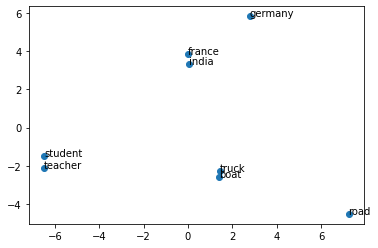

In [ ]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]
 
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
 
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

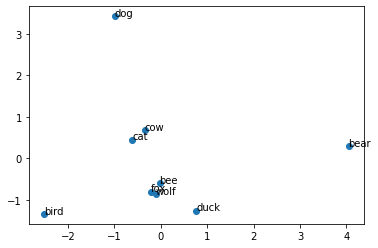

In [52]:
#Visualizing more data
# animals
words = ["cat", "dog", "bird", "duck", "fox", "wolf", "cow", "bear", "bee"]
 
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
 
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

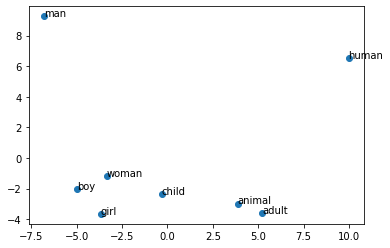

In [64]:
#Visualizing more data
# interesting!
words = ['woman', 'girl', 'boy', 'man', 'human', 'adult', 'child', 'animal']
 
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
 
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Limitations

We cannot use this model for words that were not in our original corpus.